In [47]:
import h5py
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

from tifffile import imwrite

## Code directly from Phil Harrisson, minor changes by Ebba Bergman, adapt as needed

In [49]:
# directory where we will store our smaller dataset
base_dir = "../LabData/HPV_Data/"
os.mkdir(base_dir)

# directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# directory with our training healthy cell images
train_healthy_dir = os.path.join(train_dir, 'healthy')
os.mkdir(train_healthy_dir)

# directory with our training tumor cell images
train_tumor_dir = os.path.join(train_dir, 'tumor')
os.mkdir(train_tumor_dir)

# directory with our validation healthy cell images
validation_healthy_dir = os.path.join(validation_dir, 'healthy')
os.mkdir(validation_healthy_dir)

# directory with our validation tumor cell images
validation_tumor_dir = os.path.join(validation_dir, 'tumor')
os.mkdir(validation_tumor_dir)

# directory with our test healthy cell images
test_healthy_dir = os.path.join(test_dir, 'healthy')
os.mkdir(test_healthy_dir)

# directory with our test tumor cell images
test_tumor_dir = os.path.join(test_dir, 'tumor')
os.mkdir(test_tumor_dir)

In [50]:
# directory with orginal cell images
original_dir = "../ZippedLabData/HPV_slides/"

samp_size = 333 # number of cells to sample from each glass

# dataset = subset of entire oral cancer dataset
# 80% of data for training, 20% for testing
# training data then split into 80% for proper training, 20% for validation
# all data shuffled, hence an easier classification problem than in Håkan's paper
split_prob = 0.8

slides_healthy = ['glass3', 'glass4', 'glass5', 'glass6', 'glass7', 'glass8']
slides_tumor = ['glass12', 'glass36', 'glass37', 'glass38']

# overall image size
im_x = 80
im_y = 80

center_xy = [int(im_x/2), int(im_y/2)]

# offset = 24 -> tile size of 48 x 48 
# (divides nicely by two for when max pooling, captures most of all cells, will learn faster than 80 x 80 original images)
offset = 24
xydim = offset * 2

index = 1 # index for first cell

## Code directly from Ebba Bergman, adapt as needed

In [51]:
images = []
for slide in slides_healthy:
    f = h5py.File(original_dir + slide + '.hdf5' , 'r')
    dset = f['data'][0:2][1:][:][:]
    images.append(dset)
    print(dset.shape)
    

(1, 1, 80, 80)
(1, 1, 80, 80)
(1, 1, 80, 80)
(1, 1, 80, 80)
(1, 1, 80, 80)
(1, 1, 80, 80)


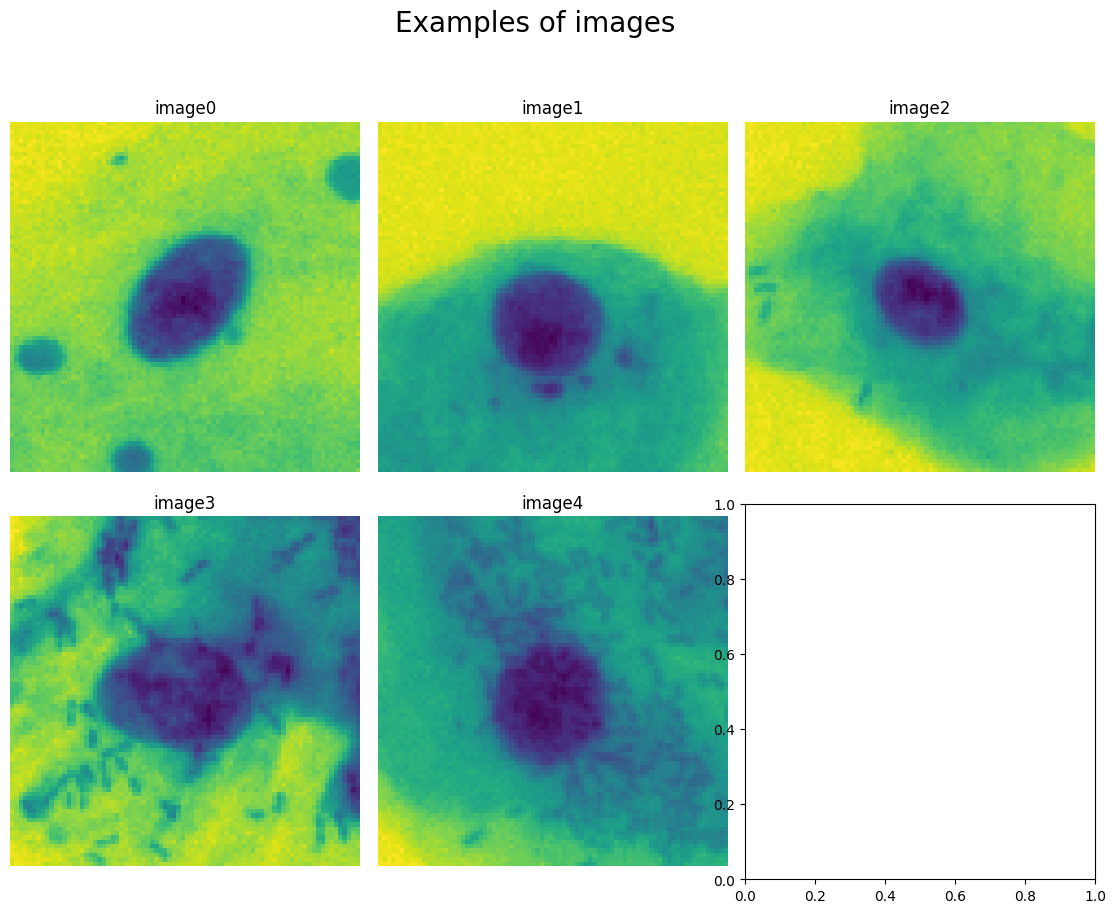

In [52]:
## Let's look at the images - always a good start to the project
# Here random images will be displayed, run this several time to see different images

figure, ax = plt.subplots(2, 3, figsize=(14, 10))
figure.suptitle("Examples of images", fontsize=20)
axes = ax.ravel()

for i in range(0,5):
    image = images[i]
    image = image.reshape(80, 80)
    axes[i].set_title("image" + str(i)) 
    axes[i].imshow(image)
    axes[i].set_axis_off()
    
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
plt.close()

## Code by Phil Harrisson, minor cahnges by Ebba Bergman, adapt as needed

In [56]:
for slide in slides_healthy:
    f = h5py.File(original_dir + slide + '.hdf5' , 'r')
    dset = f['data']   
    n_cells = dset.shape[0]
    samp = np.random.choice(n_cells, samp_size, replace=False)
    
    for i in range(samp_size):
        im = f['data'][samp[i]][0, :, :]
        crop = im[(center_xy[0] - offset):(center_xy[0] + offset), (center_xy[1] - offset):(center_xy[1] + offset)]
        im_new = np.reshape(crop, (xydim, xydim, 1))
        
        im_new2 = im_new.reshape(-1, im_new.shape[-1])
        
        if np.random.uniform(0, 1) <= split_prob:           
            if np.random.uniform(0, 1) <= split_prob:
                imwrite(train_healthy_dir + '/' + 'cell_' + str(index) + '.tif', im_new)
            
            else:
                imwrite(validation_healthy_dir + '/' + 'cell_' + str(index) + '.tif', im_new)
        
        else:
            imwrite(test_healthy_dir + '/' + 'cell_' + str(index) + '.tif', im_new)
        
        index += 1

In [57]:
for slide in slides_tumor:
    f = h5py.File(original_dir + slide + '.hdf5' , 'r')
    dset = f['data']
    
    n_cells = dset.shape[0]
    
    if slide == 'glass12':
        samp = np.random.choice(n_cells, 226, replace=False)
    else:
        samp = np.random.choice(n_cells, samp_size, replace=False)
    
    for i in range(len(samp)):
        im = f['data'][samp[i]][0, :, :]
        crop = im[(center_xy[0] - offset):(center_xy[0] + offset), (center_xy[1] - offset):(center_xy[1] + offset)]
        im_new = np.reshape(crop, (xydim, xydim, 1))
        
        im_new2 = im_new.reshape(-1, im_new.shape[-1])
        
        if np.random.uniform(0, 1) <= split_prob:            
            if np.random.uniform(0, 1) <= split_prob:
                imwrite(train_tumor_dir + '/' + 'cell_' + str(index) + '.tif', im_new)
            
            else:
                imwrite(validation_tumor_dir + '/' + 'cell_' + str(index) + '.tif', im_new)
        
        else:
            imwrite(test_tumor_dir + '/' + 'cell_' + str(index) + '.tif', im_new)
        
        index += 1